This is a straight-forward implementation of Polynomial Regression within which I have used a dataset consisting of weights and heights of different persons. The aim is to predict the height of a person (unknown/previously unseen values) given the value of its weight.
P.S : I have used the Sci-kit Learn library to use various functions effectively.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("HeightvsWeight.csv")
data.head(7)

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139
5,15,139
6,16,140


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     71 non-null     int64
 1   Height  71 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [4]:
data.describe()

,Age,Height
count,71.000000,71.000000
mean,45.000000,160.873239
std,20.639767,20.842902
min,10.000000,138.000000
25%,27.500000,143.500000
50%,45.000000,155.000000
75%,62.500000,171.500000
max,80.000000,208.000000


In [23]:
X = data.iloc[:, 0]
X = X.values.reshape(-1,1)
X.shape

(71, 1)

In [25]:
y = data.iloc[:, 1]
y = y.values.reshape(-1,1)
y.shape

(71, 1)

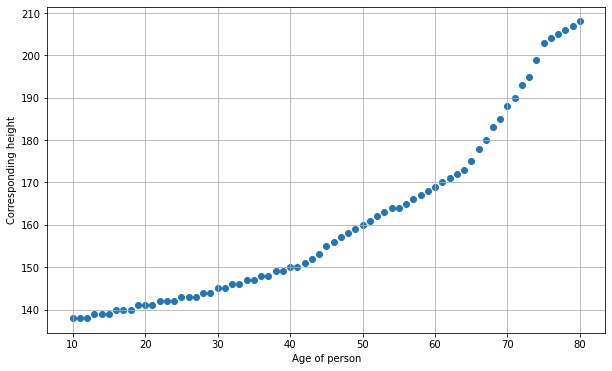

In [26]:
plt.figure(figsize = (10,6))
plt.scatter(X, y)
plt.xlabel("Age of person")
plt.ylabel("Corresponding height")
plt.grid(True)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print(X_train, y_train)

[[27]
 [68]
 [22]
 [72]
 [25]
 [16]
 [32]
 [64]
 [54]
 [10]
 [55]
 [62]
 [77]
 [23]
 [19]
 [71]
 [69]
 [21]
 [52]
 [70]
 [60]
 [51]
 [45]
 [26]
 [57]
 [28]
 [15]
 [42]
 [43]
 [50]
 [58]
 [20]
 [37]
 [13]
 [24]
 [14]
 [61]
 [67]
 [30]
 [40]
 [29]
 [44]
 [74]
 [56]
 [53]
 [11]
 [75]
 [12]
 [33]
 [39]
 [73]
 [47]
 [59]
 [49]
 [48]
 [63]] [[143]
 [183]
 [142]
 [193]
 [143]
 [140]
 [146]
 [173]
 [164]
 [138]
 [164]
 [171]
 [205]
 [142]
 [141]
 [190]
 [185]
 [141]
 [162]
 [188]
 [169]
 [161]
 [155]
 [143]
 [166]
 [144]
 [139]
 [151]
 [152]
 [160]
 [167]
 [141]
 [148]
 [139]
 [142]
 [139]
 [170]
 [180]
 [145]
 [150]
 [144]
 [153]
 [199]
 [165]
 [163]
 [138]
 [203]
 [138]
 [146]
 [149]
 [195]
 [157]
 [168]
 [159]
 [158]
 [172]]


In [28]:
print(X_test, y_test)

[[36]
 [65]
 [18]
 [38]
 [80]
 [17]
 [66]
 [76]
 [35]
 [79]
 [78]
 [31]
 [46]
 [41]
 [34]] [[148]
 [175]
 [140]
 [149]
 [208]
 [140]
 [178]
 [204]
 [147]
 [207]
 [206]
 [145]
 [156]
 [150]
 [147]]


In [29]:
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = linearModel.predict(X_test)

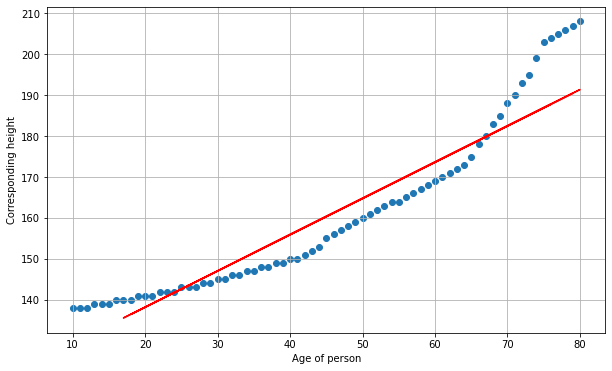

In [34]:
plt.figure(figsize = (10,6))
plt.scatter(X, y)
plt.plot(X_test, y_pred, color = "red")
plt.xlabel("Age of person")
plt.ylabel("Corresponding height")
plt.grid(True)
plt.show()

In [66]:
from sklearn.preprocessing import PolynomialFeatures
polynomialModel = PolynomialFeatures(degree = 7)
polynomial_X = polynomialModel.fit_transform(X)
linearModel2 = LinearRegression()
y_pred_poly = linearModel2.fit(polynomial_X, y)

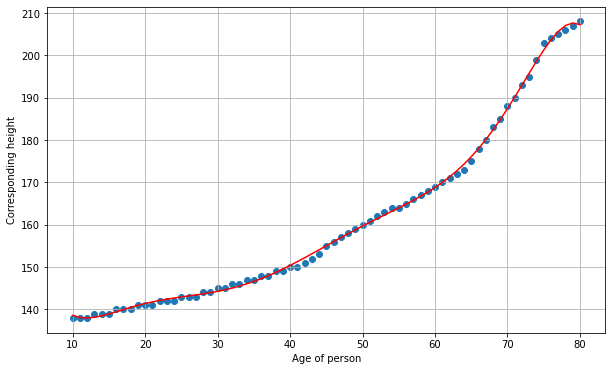

In [67]:
plt.figure(figsize = (10,6))
plt.scatter(X, y)
plt.plot(X, linearModel2.predict(polynomialModel.fit_transform(X)), color = "red")
plt.xlabel("Age of person")
plt.ylabel("Corresponding height")
plt.grid(True)
plt.show()

In [68]:
print(linearModel.predict([[81]]))

[[192.24156102]]


In [69]:
print(linearModel2.predict(polynomialModel.fit_transform([[81]])))

[[205.532092]]


As we can see that the value of height predicted by linear model is much lower and hence erroneous as compared to that predicted by our polynomial regression model. Hence, the polynomial model does the required job for us effectively.